In [129]:
s = poly(0, 's', 'r')
h = 0.1

 s  = 
  s
 h  = 
   0.1


In [17]:
w1 = (1 + 1 / ((12.8/1.2 - 6.5)*s)) * (1.18 * 0.45 + 0.068) * (2/(1 + 1.17 * s)^6)
w = w1 / (1 + w1)

 w1  = 
                                       1.198 +4.9916667s                                      
   -----------------------------------------------------------------------------------------  
   4.1666667s +29.25s^2 +85.55625s^3 +133.46775s^4 +117.11795s^5 +54.811201s^6 +10.688184s^7  
 w  = 
                                        0.1120864 +0.4670266s                                        
   ------------------------------------------------------------------------------------------------  
   0.1120864 +0.8568652s +2.7366669s^2 +8.0047507s^3 +12.487411s^4 +10.957703s^5 +5.1282051s^6 +s^7  


In [80]:
numer = coeff(w.num)
denom = coeff(w.den)
numer = [numer zeros(1, length(denom) - length(numer))]

 numer  = 
   0.1120864   0.4670266
 denom  = 
   0.1120864   0.8568652   2.7366669   8.0047507   12.487411   10.957703   5.1282051   1.
 numer  = 
   0.1120864   0.4670266   0.   0.   0.   0.   0.   0.


In [168]:
A1 = [zeros(1, 7); eye(7, 7)];
A1 = [A1 -denom']
B1 = numer'
C1 = [zeros(1, length(denom) - 1) 1]

 A1  = 
   0.   0.   0.   0.   0.   0.   0.  -0.1120864
   1.   0.   0.   0.   0.   0.   0.  -0.8568652
   0.   1.   0.   0.   0.   0.   0.  -2.7366669
   0.   0.   1.   0.   0.   0.   0.  -8.0047507
   0.   0.   0.   1.   0.   0.   0.  -12.487411
   0.   0.   0.   0.   1.   0.   0.  -10.957703
   0.   0.   0.   0.   0.   1.   0.  -5.1282051
   0.   0.   0.   0.   0.   0.   1.  -1.       
 B1  = 
   0.1120864
   0.4670266
   0.
   0.
   0.
   0.
   0.
   0.
 C1  = 
   0.   0.   0.   0.   0.   0.   0.   1.


In [169]:
// Ad = (A * h + eye(A))
Ad1 = expm(A1*h)

 Ad1  = 
   1.         -2.195D-12  -1.533D-10  -9.176D-09  -0.0000005  -0.0000182  -0.0005398  -0.0105705
   0.1         1.         -1.174D-09  -7.030D-08  -0.0000035  -0.0001394  -0.0041449  -0.0813479
   0.005       0.1         1.         -0.0000002  -0.0000112  -0.0004473  -0.0133192  -0.2622309
   0.0001667   0.005       0.1         0.9999993  -0.0000329  -0.0013092  -0.0389983  -0.7682209
   0.0000042   0.0001667   0.005       0.099999    0.9999484  -0.0020577  -0.0614489  -1.2166449
   8.333D-08   0.0000042   0.0001667   0.0049991   0.0999543   0.9981716  -0.0548303  -1.0948338
   1.388D-09   8.323D-08   0.0000042   0.0001662   0.0049782   0.0991227   0.973474   -0.5384544
   1.958D-11   1.368D-09   8.186D-08   0.0000041   0.0001622   0.004816    0.0943067   0.8791673


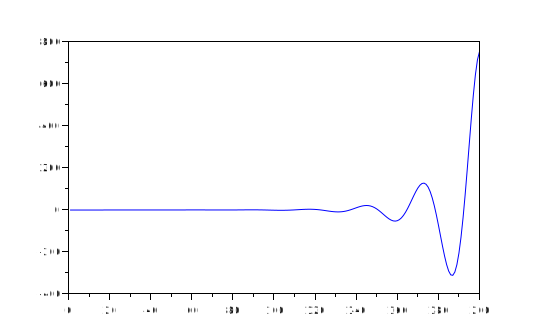

In [170]:
hd1 = [];
adk1 = eye(Ad1);
// for k=1:50 hd = [hd; C*Ad^(k - 1)*B]
for k=1:200 
    hd1 = [hd1; C1*adk1*B1];
    adk1 = adk1 * Ad1;
end;
plot(hd1)

In [157]:
sys = syslin('c', w);
sysd = dscr(sys, h);
Ad2 = sysd.A
B2 = sysd.B
C2 = sysd.C

 Ad2  = 
   1.0124896   0.0384207   0.0009191   0.0000303   0.0000015   0.0000001  -3.262D-11
  -0.0041041   1.0089871   0.0482487   0.0023825   0.0001578   0.0000143  -5.076D-09
   0.0018344  -0.0040683   1.0017027   0.0990023   0.0098116   0.0011597  -0.0000005
  -0.0009835   0.0001428  -0.0015958   0.9986196   0.1966201   0.0336356  -0.0000204
  -0.0077835  -0.0118821  -0.0170201  -0.026934    0.9520726   0.3071037  -0.0002923
  -0.0358211  -0.0540182  -0.0784244  -0.1241939  -0.2237458   0.5583265  -0.0013272
  -0.0122056   0.0267038  -0.0114513   0.0133427  -0.005676    0.0003938   0.9762854
 B2  = 
  -1.422D-09
  -0.0000002
  -0.0000226
  -0.0008916
  -0.0128042
  -0.0584258
  -0.0000114
 C2  = 
  -0.4253647  -1.388D-17   0.  -1.735D-18   2.168D-19  -6.776D-21   0.


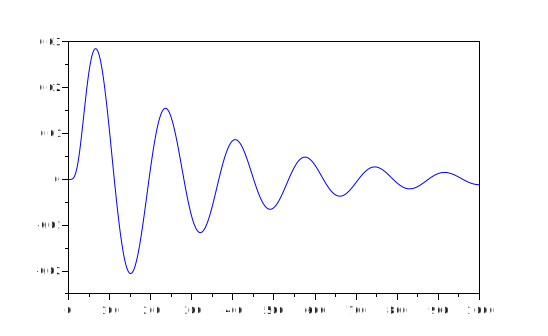

In [159]:
hd2 = [];
adk2 = eye(Ad2);
// for k=1:50 hd = [hd; C*Ad^(k - 1)*B]
for k=1:1000 
    hd2 = [hd2; C2*adk2*B2];
    adk2 = adk2 * Ad2;
end;
plot(hd2)

In [160]:
hh = [
    4.135E-11
    1.168E-02
    2.062E-01
    6.951E-01
    1.250E+00
    1.584E+00
    1.560E+00
    1.242E+00
    8.351E-01
    5.624E-01
    5.463E-01
    7.644E-01
    1.073E+00
    1.303E+00
    1.348E+00
    1.208E+00
    9.794E-01
    7.911E-01
    7.341E-01
    8.214E-01
    9.883E-01
    1.140E+00
    1.200E+00
    1.151E+00
    1.032E+00
    9.105E-01
    8.516E-01
    8.761E-01
    9.607E-01
    1.054E+00
    1.108E+00
    1.100E+00
    1.042E+00
    9.696E-01
    9.224E-01
    9.205E-01
    9.594E-01
    1.014E+00
    1.054E+00
    1.062E+00
    1.038E+00
    9.966E-01
    9.628E-01
    9.524E-01
    9.676E-01
    9.971E-01
    1.025E+00
    1.036E+00
    1.027E+00
    1.006E+00
];


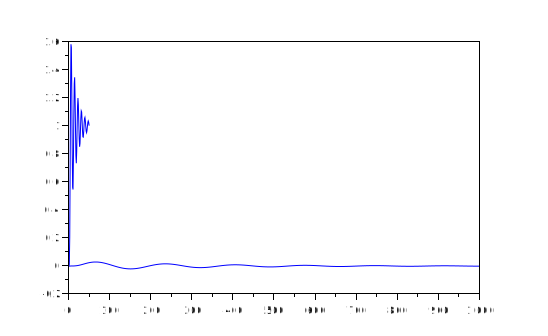

In [163]:
plot(hh)
// plot(hd1)
plot(hd2)